# Histogram of Predicted Uncertainties

This plots data written by the `process_uncertainties.py` script.

In [19]:
import sys

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD

sns.set()

In [20]:
dfs = {}

for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1):
    dfs[i] = pd.read_csv(
        f"../data/processed/skew_gaussian/k200/delta_window8/processed_daysahead{i}_R000.csv"
    )

dfs[1].head()

,current_time,forward_time,forward_Vp_pred,forward_Vp_obs,forward_loc,forward_scale,forward_shape,forward_crps
0,2010-01-04 00:00:00,2010-01-04 18:00:00,357.800000,301.66,261.853691,116.269186,4.261521,NaN
1,2010-01-04 06:00:00,2010-01-05 00:00:00,355.833333,291.15,262.501066,114.197348,4.167249,NaN
2,2010-01-04 12:00:00,2010-01-05 06:00:00,324.750000,290.25,264.672094,114.523985,4.026450,NaN
3,2010-01-04 18:00:00,2010-01-05 12:00:00,326.833333,301.98,236.211721,108.269984,3.999830,NaN
4,2010-01-05 00:00:00,2010-01-05 18:00:00,336.666667,321.81,240.796825,102.744568,3.601217,NaN


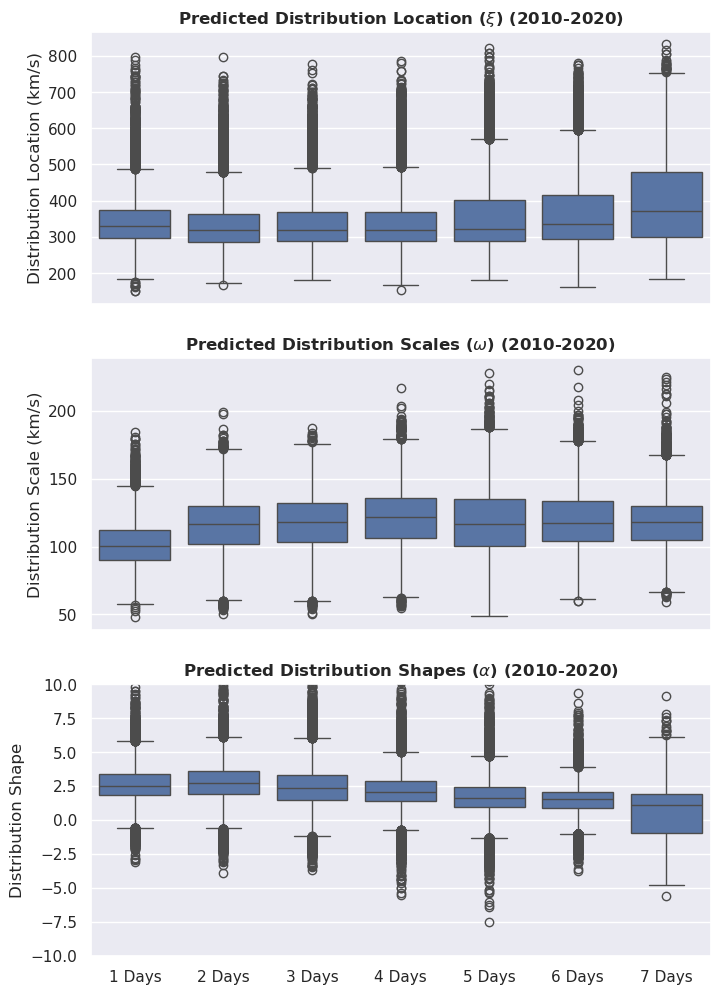

In [30]:
bins = np.arange(35, 190, 1)

fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

ax = axes[0]
data_list = []
for daysahead, df in dfs.items():
    for value in df.forward_loc:
        data_list.append(dict(group=f"{daysahead} Days", value=value))
sns.boxplot(pd.DataFrame(data_list), x="group", y="value", ax=ax)
ax.set_ylabel(r"Distribution Location (km/s)")
# ax.set_xlabel("# Days Ahead")
ax.set_title(r"Predicted Distribution Location ($\xi$) (2010-2020)", fontweight="bold")

ax = axes[1]
data_list = []
for daysahead, df in dfs.items():
    for value in df.forward_scale:
        data_list.append(dict(group=f"{daysahead} Days", value=value))
sns.boxplot(pd.DataFrame(data_list), x="group", y="value", ax=ax)
ax.set_ylabel(r"Distribution Scale (km/s)")
# ax.set_xlabel("# Days Ahead")
ax.set_title(r"Predicted Distribution Scales ($\omega$) (2010-2020)", fontweight="bold")

ax = axes[2]
data_list = []
for daysahead, df in dfs.items():
    for value in df.forward_shape:
        data_list.append(dict(group=f"{daysahead} Days", value=value))
sns.boxplot(pd.DataFrame(data_list), x="group", y="value", ax=ax)
ax.set_ylabel(r"Distribution Shape")
ax.set_label("# Days Ahead")
ax.set_title(r"Predicted Distribution Shapes ($\alpha$) (2010-2020)", fontweight="bold")
ax.set_ylim([-10, 10])
ax.set_xlabel("")
fig.savefig("../plots/distribution_of_variables.png", dpi=300)